## Task 8
Carlos Andres Daza Rachen
J4134C

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
import time
from time import perf_counter
from scipy.optimize import curve_fit
from tqdm import tqdm

## Floyd Warshall Algorithm

In [22]:
def generate_matrix(n):    
    matrix = np.zeros((n,n), dtype=int)

    for i in range(n):
        for j in range(n):
            k = np.random.randint(1,11)            
            if i != j :
                if k != 10:
                    matrix[i, j] = k
                else:
                     matrix[i, j] = 99
    
    return matrix

def linear(x, a, b):
    return a * x + b

def cube(x, a, b):
    return a * x**3 + b

def theo_linear(mean):
    theoretical= curve_fit(linear,np.arange(1,len(mean)+1),mean)    
    return(linear(np.arange(1,len(mean)+1), *theoretical[0]))

def theo_cube(mean):
    theoretical= curve_fit(cube,np.arange(1,len(mean)+1),mean)    
    return(cube(np.arange(1,len(mean)+1), *theoretical[0]))

In [6]:
# Algorithm implementation
def floyd_warshall(n):
    times= np.zeros(n)
    m=generate_matrix(n)
    distance = list(map(lambda i: list(map(lambda j: j, i)), m))       
    start_iter =perf_counter()
    for i in range(n):
        for j in range(n):
            for k in range(n):                
                distance[j][k] = min(distance[j][k], distance[j][i] + distance[i][k])
    duration = perf_counter()-start_iter 
    ##    print_solution(distance, n)   
    return duration
       


# Printing the solution
def print_solution(distance, nv):
    for i in range(nv):
        for j in range(nv):
            if(distance[i][j] == 99):
                print("INF", end=" ")
            else:
                print(distance[i][j], end="  ")
        print(" ")




In [14]:
def plot_execution_times(n, times, theo):
    size_m=np.arange(1,n+1)
    plt.figure(figsize=(10,5))
    plt.plot(size_m, times, label='empirical')
    plt.plot(size_m, theo, label='theoretical')
    plt.title("Floyd", fontweight='bold')
    plt.ylabel('Time (s)')
    plt.xlabel('Size of Matrix')
    plt.legend()
    plt.show()

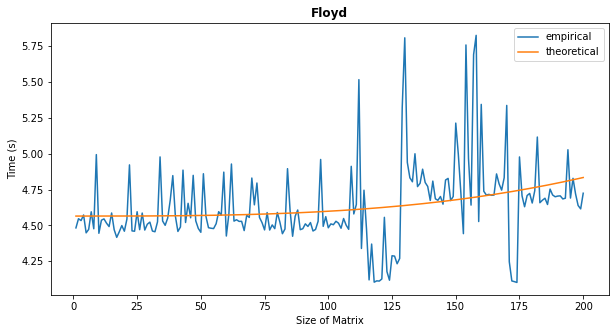

In [15]:
n=200
times = []
for i in range(n):
    times.append(floyd_warshall(n))
theo=theo_cube(times)

plot_execution_times(n, times, theo)



### Rabin Karp String Matching

In [20]:
def rabin_karp_sm(T, P, d, q):

    n, m, d, q = len(T), len(P), d, q
    
    found = []
    h = 1
    p = 0
    t = 0
    
    for i in range(m-1):
        h = (h*d) % q

    for i in range(m):
        p = (d*p + ord(P[i])) % q
        t = (d*t + ord(T[i])) % q

    for i in range(n-m+1):
        if p == t:  
                      
            for j in range(m):
                if T[i+j] != P[j]:
                    break

            j += 1
            if j == m:
                found.append(i)                

        if i < n-m:
            t = (d*(t-ord(T[i])*h) + ord(T[i+m])) % q

            if t < 0:
                t = t+q

    return found

In [17]:
def generate_text(pattern, size=5000, seed=42):
    # lock random seed
    np.random.seed(seed)
    
    # generate 2000 random ascii char
    T = np.random.randint(ord('a'), ord('z'), size)
    
    # convert pattern into ascii
    p_ascii = [ord(i) for i in pattern]

    # insert ascii pattern into ascii char
    index = random.randint(0, len(T) - len(p_ascii))
    T[index:index+len(p_ascii)] = p_ascii

    # convert ascii char to text
    T = [chr(i) for i in T]

    return ''.join(T)

In [19]:
pattern = 'science'
T = generate_text(pattern)
d = 10
q = 13

In [23]:
rk_total_time = np.zeros(5000-len(pattern))

for i in range(5):
    times = []

    for j in tqdm(range(len(pattern),5000)):
        # start time
        start = time.time()

        # if j < len(pattern):
        #     rabin_karp_sm(T[:len(pattern)], pattern, d, q)
        # else:
        rabin_karp_sm(T[:j], pattern, d, q)

        # end time
        end = time.time() - start
        times.append(end)

    rk_total_time += np.array(times)

rk_mean_time = rk_total_time / 5

100%|██████████| 4993/4993 [00:09<00:00, 554.01it/s] 


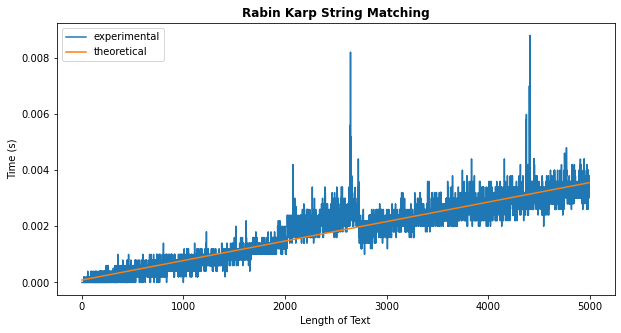

In [24]:
x = np.arange(1,5001-len(pattern))
theo=theo_linear(rk_mean_time)
plt.figure(figsize=(10,5))
plt.plot(x, rk_mean_time, label='experimental')
plt.plot(x, theo, label='theoretical')
plt.title('Rabin Karp String Matching', fontweight='bold')
plt.ylabel('Time (s)')
plt.xlabel('Length of Text')
plt.legend()
plt.show()